In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# system = 'Rossler'
# n = 10000
# time_span = 5
# time_step = 0.1
# integration_time_step = 0.01
# number_timesteps_predict = 5
# std = 0.01

# name = f"{system}_{n}_{time_span}_{str(time_step).replace('.', '')}_{str(integration_time_step).replace('.', '')}_{number_timesteps_predict}_{str(std).replace('.', '')}"
# filename = f'data_dictionaries/data_{name}.npy'
# dictionary = np.load(filename, allow_pickle=True).item()
# t = np.arange(0, time_span, time_step)
# c = 100

# # Scale the data back up
# maximum_allowed = 100
# all_s = dictionary["observations"]*maximum_allowed
# all_prediction = dictionary["x_transformation_0"][c]*maximum_allowed
# all_delta = all_prediction - all_s[:,-1,:]

In [26]:
system = 'Lorentz'
number_data_points = 10000
time_span = 5
time_step = 0.1
number_timesteps_predict = 1

name = f"{system}_{number_data_points}"
filename = f'data_dictionaries/data_std0_{name}.npy'

dictionary = np.load(filename, allow_pickle=True).item()
t = np.arange(0, time_span, time_step)
c = 100

# Scale the data back up
maximum_allowed = 100
s = dictionary["observations"]*maximum_allowed
prediction = dictionary[f'timesteps_{number_timesteps_predict}']["x_transformation_0"][c]*maximum_allowed
delta = prediction[:-number_timesteps_predict,:] - s[number_timesteps_predict:,:]
print((delta**2).mean())

0.07015992310610807


In [ ]:
# i = 0
# s = all_s[i, :, :]
# prediction = all_prediction[i,:]
# adelta = prediction - s[-1,:]

In [ ]:
# print(all_delta.shape)
# plt.scatter(all_delta[:,0], all_delta[:,1], s=5)
# plt.ylabel('delta_y')
# plt.xlabel('delta_x')
# plt.show()
# plt.scatter(all_delta[:,0], all_delta[:,2], s=5)
# plt.ylabel('delta_z')
# plt.xlabel('delta_x')
# plt.show()
# plt.scatter(all_delta[:,1], all_delta[:,2], s=5)
# plt.ylabel('delta_z')
# plt.xlabel('delta_y')
# plt.show()
# ax = plt.figure().add_subplot(projection='3d')
# ax.plot(all_delta[:,0], all_delta[:,1], all_delta[:,2], linewidth=0.2)
# plt.show()

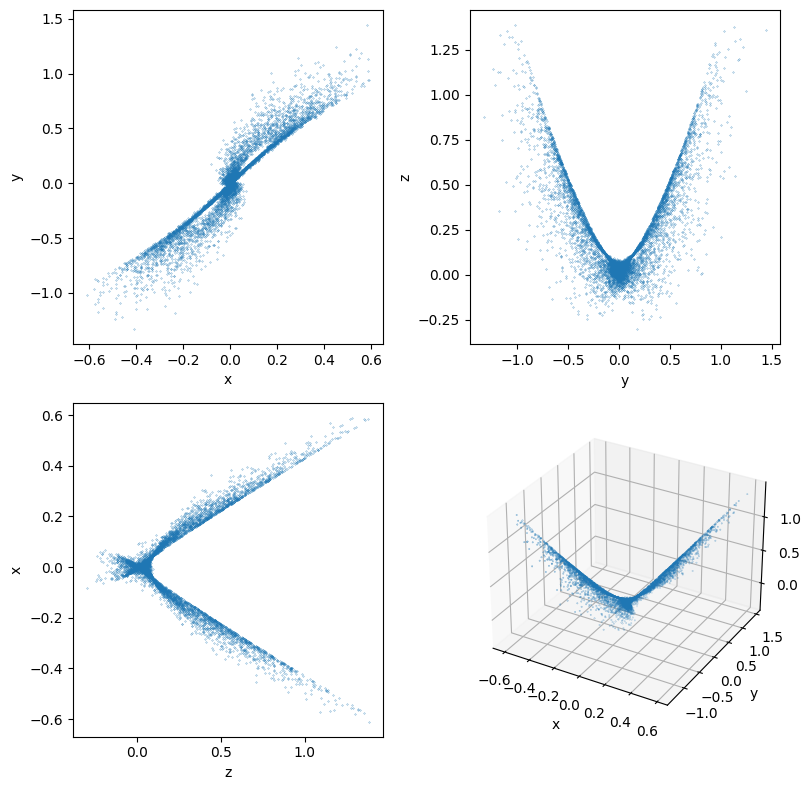

In [73]:
# fig, axs = plt.subplots(2, 2)
# axs[0, 0].plot(x, y)
# axs[0, 0].set_title('Axis [0, 0]')
# axs[0, 1].plot(x, y, 'tab:orange')
# axs[0, 1].set_title('Axis [0, 1]')
# axs[1, 0].plot(x, -y, 'tab:green')
# axs[1, 0].set_title('Axis [1, 0]')
# axs[1, 1].plot(x, -y, 'tab:red')
# axs[1, 1].set_title('Axis [1, 1]')

# print(delta.shape)
# axs[0, 0].scatter(delta[:,0], delta[:,1], s=1)
# axs[0, 0].ylabel('delta_y')
# axs[0, 0].xlabel('delta_x')
# ax[0,0].set(xlabel='delta_x', ylabel='delta_y')
# axs[0, 1].scatter(delta[:,0], delta[:,2], s=1)
# axs[0, 1].ylabel('delta_z')
# axs[0, 1].xlabel('delta_x')
# axs[1, 0].scatter(delta[:,1], delta[:,2], s=1)
# axs[1, 0].ylabel('delta_z')
# axs[1, 0].xlabel('delta_y')
# axs[1,1] = plt.figure().add_subplot(projection='3d')
# axs[1,1].scatter(delta[:,0], delta[:,1], delta[:,2], s=1)
# plt.show()

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 8))
x_label = ['x', 'y', 'z']
ssize = 0.05

# Plotting scatter plots
for i, ax in enumerate(axes.flat):
    if i == 3:
        ax.set_xticks([])
        ax.set_yticks([])
        ax.spines['top'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
        ax.spines['left'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax = fig.add_subplot(2, 2, 4, projection='3d')
        ax.scatter(delta[:,0], delta[:,1], delta[:,2], s=ssize)
        ax.set_xlabel('x')
        ax.set_ylabel('y')
        ax.set_zlabel('z')
        

    else:
        x = delta[:,i]
        y = delta[:,(i + 1) % 3]  # Cycle through the data arrays
        ax.scatter(x, y, s=ssize)
        # ax.set_title(f"Scatter Plot {i+1}")
    
        ax.set_xlabel(x_label[i])
        ax.set_ylabel(x_label[(i + 1) % 3])
        ax.spines['top'].set_visible(True)
        ax.spines['bottom'].set_visible(True)
        ax.spines['left'].set_visible(True)
        ax.spines['right'].set_visible(True)
    
        

# # Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.savefig(f'delta_{system}_c{str(c)}_timesteps_{number_timesteps_predict}.png', dpi=300, format='png', bbox_inches='tight', pad_inches=0.25)
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


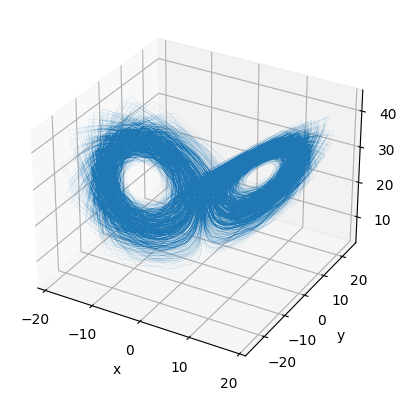

In [16]:
ax = plt.figure().add_subplot(projection='3d')
ax.plot(s[:,0], s[:,1], s[:,2], linewidth=0.05)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

# ax.scatter(all_s[i,-1,0], all_s[i,-1,1], all_s[i,-1,2], color = 'r')
# plt.savefig('Lorenz_std0_3D.eps', format='eps')
plt.savefig('Lorenz_std0_3D.eps', format='eps', bbox_inches="tight", pad_inches=0.05, dpi=600)
plt.show()

In [ ]:
ax = plt.figure().add_subplot(projection='3d')
ax.scatter(all_s[:,0,0], all_s[:,0,1], all_s[:,0,2], linewidth=0.2)
plt.show()

In [64]:
from load_and_prepare_data_functions import load_and_subsample_series, split_training_data

system = 'Moore'
number_data_points = 10000
time_span = 5
time_step = 0.1
number_timesteps_predict = 1
length_of_subsequence = 20
x_transformation_type = 0
c = np.inf

observations, predictions = load_and_subsample_series(number_data_points,
                                                      system,
                                                      length_of_subsequence + number_timesteps_predict,
                                                      number_timesteps_predict = number_timesteps_predict,
                                                      x_transformation_type = x_transformation_type,
                                                      c = c, filename= filename)

train_X, test_X, train_answer, test_answer = split_training_data(observations,
                                                                 number_timesteps_predict,
                                                                 predictions = predictions)

In [65]:
((train_answer - train_X['input_pred'])**2).mean()

3.895525818430987e-08